<a href="https://colab.research.google.com/github/MinaAlberDS/Codveda-Internship/blob/master/Level%201/Task%202/Data_cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Cleaning

### Prepare the Notebook

In [321]:
# Import needed libraries

import pandas as pd
import numpy as np
pd.set_option("display.max_columns", None)

# load the collected data
re_df = pd.read_csv(r"D:\Data science project\Data science\Codveda-internship\Level 1\Task 1\real_estates_data.csv")

# Preview the data
print("The Real Estates data")
re_df

The Real Estates data


,name,price,property_type,bedrooms,bathrooms,sqm,year_built,features,city,governorate,address,description
0,Alamain (Latin District),"6,594,000 EGP","Residential, Apartment",1,0,92.86,2025,"['Other', 'Security Gate', 'Electricity Availa...",North Coast,Alexandria,Building F04 Floor 6 Unit Z02-CL05-F04-X7-06-1...,Latini by Saudi Egyptian Developers (SED) – Ne...
1,Beachfront Tower - B1,"66,104,000 EGP","Residential, Apartment",3,3,398.00,2025,['Other'],Mersa Matruh,Matrouh,Building BTB1 Floor 9th floor Unit BTB1091 Bea...,Explore a lifestyle that allows you to have yo...
2,PODIA,"12,824,000 EGP","Commercial, Office",0,0,93.00,2025,"['Other', '24 Hour Security', 'Fire Alarm', 'G...",Cairo,Cairo,Floor 13th Unit MPO-1304-A Bin ZayedNorth PODI...,Launched by Menassat Developments in cooperati...
3,Mazarine Apartment,"12,857,000 EGP","Residential, Apartment",3,3,252.00,2025,"['24 Hour Security', 'Electricity Available']",Mersa Matruh,Matrouh,Building MZCS15 Floor 3rd floor Unit MZCS1531 ...,The name ‘Mazarine’ came to fruition based on ...
4,Alamain (Latin District),"8,721,000 EGP","Residential, Apartment",3,0,209.42,2025,"['Other', 'Security Gate', 'Electricity Availa...",North Coast,Alexandria,Building E01 Floor 1 Unit Z02-CL09-E01-X4-01-0...,One of the main districts in this new city nei...
...,...,...,...,...,...,...,...,...,...,...,...,...
895,Latin City,"7,967,000 EGP","Residential, Apartment",2,1,134.00,2025,"['24 Hour Security', 'Other']",North Coast,Matrouh,Building Z3CL0401 Floor 5 Unit LC301508 Latin ...,The Latin District is an expansion of the Alex...
896,Alamain (Latin District),"7,063,000 EGP","Residential, Apartment",4,0,229.35,2025,"['Other', 'Security Gate', 'Electricity Availa...",North Coast,Alexandria,Building A13 Floor 6 Unit Z05-CL11-A13-M7-06-0...,Latini by Saudi Egyptian Developers (SED) – Ne...
897,Central,"41,470,000 EGP","Commercial, Office",0,0,217.17,2025,"['Elevator(s)', 'Gate Community', 'Electricity...",New Cairo,Cairo,Building O10 Floor 4 Unit O10-04-B Central New...,"True to its name, Central is situated at the c..."
898,Central,"17,350,000 EGP","Commercial, Office",0,0,176.52,2025,"['Elevator(s)', 'Gate Community', 'Electricity...",New Cairo,Cairo,Building O5 Floor 2 Unit O5-02-M Central New C...,"True to its name, Central is situated at the c..."


### Remove Duplicates

In [322]:
def duplicates_sum(data:pd.DataFrame):
    """Return duplicated rows and print the count and percentage of duplicates in the DataFrame."""
    duplicates = data.duplicated() # the duplicated rows
    # print the count of duplicates in the data
    print(f"The sum of duplicates: {duplicates.sum()} row, which is {(duplicates.sum() / data.shape[0])* 100:.2f} % of the data")
    return duplicates[duplicates == True]

duplicates = duplicates_sum(re_df)

# Drop This duplicates
re_df.drop(duplicates.index, inplace=True)
print("The duplicates has been removed.")

# See the sum of the duplicates again

duplicates = duplicates_sum(re_df)

The sum of duplicates: 119 row, which is 13.22 % of the data
The duplicates has been removed.
The sum of duplicates: 0 row, which is 0.00 % of the data


### Handling missing values

In [323]:
### print the sum of NaN values
print(f"The sum of the Null values: {re_df.isnull().sum().sum()}")

The sum of the Null values: 0


In [324]:
### See the unique values of the columns to check the Null value, and the formats
for column in re_df.drop(["description", "address"], axis =1).columns:
    unique_values = re_df[column].unique()
    print(f"Unique values in column '{column}': {unique_values}")

Unique values in column 'name': ['Alamain (Latin District)' 'Beachfront Tower - B1' 'PODIA'
 'Mazarine Apartment' 'Latin City' 'Downtown commercial'
 'Downtown Extension' 'Zahya' 'Al Fustat' 'Jade Park' 'AlMaqsad Park'
 'Central' 'Mazarine Commercial' 'New Garden City' 'Mamsha Avenue'
 'BEGONIA' 'Maspero Business Tower Nile Heights' 'Marina 8 By The Lake'
 'Blu Vert' 'Mazarine' 'Maspero mall' 'Downtown' 'VALORY'
 'Maspero Heights – Commercial  for Sale']
Unique values in column 'price': ['6,594,000 EGP' '66,104,000 EGP' '12,824,000 EGP' '12,857,000 EGP'
 '8,721,000 EGP' '6,688,000 EGP' '32,696,000 EGP' '28,507,000 EGP'
 '36,428,000 EGP' '8,368,000 EGP' '4,121,000 EGP' '10,837,000 EGP'
 '66,602,000 EGP' '4,172,000 EGP' '17,611,000 EGP' '9,942,000 EGP'
 '4,851,000 EGP' '9,399,000 EGP' '34,326,000 EGP' '8,648,000 EGP'
 '15,755,000 EGP' '3,170,000 EGP' '34,518,000 EGP' '14,253,000 EGP'
 '4,303,000 EGP' '19,575,000 EGP' '36,036,000 EGP' '15,006,000 EGP'
 '5,902,000 EGP' '14,863,000 EGP' '25

There isn't any Null value in the data

### Handling the formating

> Reformat the price format to be *int*

#### Reformat the price fomrate

In [325]:
### first I want to check if there are decimals in the prices or not
contain_decimals = re_df[re_df["price"].str.contains(r"\.")].sum().sum() # the sum of prices that contain decimals
print(f"Sum of prices that contain decimals: {contain_decimals:.0f}")

Sum of prices that contain decimals: 0


So Steps:
- [x] Remove EGP, and it on the column name(Price (EGP))
- [x] Remove "," from the prices values

In [326]:
re_df["Price(EGP)"] = re_df["price"].str.replace("EGP", "", regex=True).str.replace(",","", regex=True).astype(int) # remove EGP, and "," from the values. Convert it to int
# remove the old column
re_df.drop("price", axis =1, inplace=True)
print(f"Price dtype after reformating: {re_df["Price(EGP)"].dtype}")
re_df

Price dtype after reformating: int64


,name,property_type,bedrooms,bathrooms,sqm,year_built,features,city,governorate,address,description,Price(EGP)
0,Alamain (Latin District),"Residential, Apartment",1,0,92.86,2025,"['Other', 'Security Gate', 'Electricity Availa...",North Coast,Alexandria,Building F04 Floor 6 Unit Z02-CL05-F04-X7-06-1...,Latini by Saudi Egyptian Developers (SED) – Ne...,6594000
1,Beachfront Tower - B1,"Residential, Apartment",3,3,398.00,2025,['Other'],Mersa Matruh,Matrouh,Building BTB1 Floor 9th floor Unit BTB1091 Bea...,Explore a lifestyle that allows you to have yo...,66104000
2,PODIA,"Commercial, Office",0,0,93.00,2025,"['Other', '24 Hour Security', 'Fire Alarm', 'G...",Cairo,Cairo,Floor 13th Unit MPO-1304-A Bin ZayedNorth PODI...,Launched by Menassat Developments in cooperati...,12824000
3,Mazarine Apartment,"Residential, Apartment",3,3,252.00,2025,"['24 Hour Security', 'Electricity Available']",Mersa Matruh,Matrouh,Building MZCS15 Floor 3rd floor Unit MZCS1531 ...,The name ‘Mazarine’ came to fruition based on ...,12857000
4,Alamain (Latin District),"Residential, Apartment",3,0,209.42,2025,"['Other', 'Security Gate', 'Electricity Availa...",North Coast,Alexandria,Building E01 Floor 1 Unit Z02-CL09-E01-X4-01-0...,One of the main districts in this new city nei...,8721000
...,...,...,...,...,...,...,...,...,...,...,...,...
895,Latin City,"Residential, Apartment",2,1,134.00,2025,"['24 Hour Security', 'Other']",North Coast,Matrouh,Building Z3CL0401 Floor 5 Unit LC301508 Latin ...,The Latin District is an expansion of the Alex...,7967000
896,Alamain (Latin District),"Residential, Apartment",4,0,229.35,2025,"['Other', 'Security Gate', 'Electricity Availa...",North Coast,Alexandria,Building A13 Floor 6 Unit Z05-CL11-A13-M7-06-0...,Latini by Saudi Egyptian Developers (SED) – Ne...,7063000
897,Central,"Commercial, Office",0,0,217.17,2025,"['Elevator(s)', 'Gate Community', 'Electricity...",New Cairo,Cairo,Building O10 Floor 4 Unit O10-04-B Central New...,"True to its name, Central is situated at the c...",41470000
898,Central,"Commercial, Office",0,0,176.52,2025,"['Elevator(s)', 'Gate Community', 'Electricity...",New Cairo,Cairo,Building O5 Floor 2 Unit O5-02-M Central New C...,"True to its name, Central is situated at the c...",17350000


#### Fix the features list format 

In [327]:
### fix string representation of a list problem in the features data
import ast
re_df["features"] = re_df["features"].apply(ast.literal_eval) # Fix the problem

In [328]:
re_df["features"]

0          [Other, Security Gate, Electricity Available]
1                                                [Other]
2      [Other, 24 Hour Security, Fire Alarm, Gate Com...
3              [24 Hour Security, Electricity Available]
4          [Other, Security Gate, Electricity Available]
                             ...                        
895                            [24 Hour Security, Other]
896        [Other, Security Gate, Electricity Available]
897    [Elevator(s), Gate Community, Electricity Avai...
898    [Elevator(s), Gate Community, Electricity Avai...
899                                              [Other]
Name: features, Length: 781, dtype: object

## Feature Engineering


### separate Property category from sub type

In [329]:
### separate the property type from the real estate type to Property category, and Property sub type
re_df[["property_category", "property_subType"]] = re_df["property_type"].str.split(",", expand=True) # Split the after comma from the before it to two columns
re_df["property_subType"] = re_df["property_subType"].str.strip() # remove the beigning space
# Remove the old column
re_df.drop("property_type", axis = 1, inplace=True)

re_df.head()

,name,bedrooms,bathrooms,sqm,year_built,features,city,governorate,address,description,Price(EGP),property_category,property_subType
0,Alamain (Latin District),1,0,92.86,2025,"[Other, Security Gate, Electricity Available]",North Coast,Alexandria,Building F04 Floor 6 Unit Z02-CL05-F04-X7-06-1...,Latini by Saudi Egyptian Developers (SED) – Ne...,6594000,Residential,Apartment
1,Beachfront Tower - B1,3,3,398.00,2025,[Other],Mersa Matruh,Matrouh,Building BTB1 Floor 9th floor Unit BTB1091 Bea...,Explore a lifestyle that allows you to have yo...,66104000,Residential,Apartment
2,PODIA,0,0,93.00,2025,"[Other, 24 Hour Security, Fire Alarm, Gate Com...",Cairo,Cairo,Floor 13th Unit MPO-1304-A Bin ZayedNorth PODI...,Launched by Menassat Developments in cooperati...,12824000,Commercial,Office
3,Mazarine Apartment,3,3,252.00,2025,"[24 Hour Security, Electricity Available]",Mersa Matruh,Matrouh,Building MZCS15 Floor 3rd floor Unit MZCS1531 ...,The name ‘Mazarine’ came to fruition based on ...,12857000,Residential,Apartment
4,Alamain (Latin District),3,0,209.42,2025,"[Other, Security Gate, Electricity Available]",North Coast,Alexandria,Building E01 Floor 1 Unit Z02-CL09-E01-X4-01-0...,One of the main districts in this new city nei...,8721000,Residential,Apartment


In [330]:
re_df["property_subType"].unique()

array(['Apartment', 'Office', 'Retail', 'Twinhouse', 'Villa', 'Townhouse',
       'Duplex', 'Penthouse', 'property.Types.CABANA',
       'Retail Building/Mall', 'Medical Facility'], dtype=object)

Combine some of them to reduce the dummy variables

In [331]:
re_df["property_subType"].replace(["Twinhouse", "Townhouse"], "Residential - Attached Houses", inplace=True) 
re_df["property_subType"].replace(["Apartment", "Penthouse", "Duplex"], "Apartment (Residential - Multi-Story Units)", inplace=True) 
re_df["property_subType"].replace(["Retail", 'Retail Building/Mall'], "Retail", inplace=True) 
re_df["property_subType"].replace("property.Types.CABANA", "Cabana", inplace=True) 
re_df["property_subType"].replace("Office", "Office (Commercial - Professional)")

re_df["property_subType"].unique()

C:\Users\minaa\AppData\Local\Temp\ipykernel_13420\3733764033.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  re_df["property_subType"].replace(["Twinhouse", "Townhouse"], "Residential - Attached Houses", inplace=True)


array(['Apartment (Residential - Multi-Story Units)', 'Office', 'Retail',
       'Residential - Attached Houses', 'Villa', 'Cabana',
       'Medical Facility'], dtype=object)

### Create price per Sqm where Sqm → $m^2$

In [332]:
re_df["Price/Sqm"] = round(re_df["Price(EGP)"] / re_df["sqm"], 4) # Create the column, with 4 decimals
print("Preview the data after creating Price/Sqm column")
re_df.head()

Preview the data after creating Price/Sqm column


,name,bedrooms,bathrooms,sqm,year_built,features,city,governorate,address,description,Price(EGP),property_category,property_subType,Price/Sqm
0,Alamain (Latin District),1,0,92.86,2025,"[Other, Security Gate, Electricity Available]",North Coast,Alexandria,Building F04 Floor 6 Unit Z02-CL05-F04-X7-06-1...,Latini by Saudi Egyptian Developers (SED) – Ne...,6594000,Residential,Apartment (Residential - Multi-Story Units),71010.1228
1,Beachfront Tower - B1,3,3,398.00,2025,[Other],Mersa Matruh,Matrouh,Building BTB1 Floor 9th floor Unit BTB1091 Bea...,Explore a lifestyle that allows you to have yo...,66104000,Residential,Apartment (Residential - Multi-Story Units),166090.4523
2,PODIA,0,0,93.00,2025,"[Other, 24 Hour Security, Fire Alarm, Gate Com...",Cairo,Cairo,Floor 13th Unit MPO-1304-A Bin ZayedNorth PODI...,Launched by Menassat Developments in cooperati...,12824000,Commercial,Office,137892.4731
3,Mazarine Apartment,3,3,252.00,2025,"[24 Hour Security, Electricity Available]",Mersa Matruh,Matrouh,Building MZCS15 Floor 3rd floor Unit MZCS1531 ...,The name ‘Mazarine’ came to fruition based on ...,12857000,Residential,Apartment (Residential - Multi-Story Units),51019.8413
4,Alamain (Latin District),3,0,209.42,2025,"[Other, Security Gate, Electricity Available]",North Coast,Alexandria,Building E01 Floor 1 Unit Z02-CL09-E01-X4-01-0...,One of the main districts in this new city nei...,8721000,Residential,Apartment (Residential - Multi-Story Units),41643.5870


### Make column for every feature

#### See, and understand the features

In [333]:
unique_features = re_df["features"].explode() # show the unique features
print(f"Unique features:")
unique_features.value_counts()

Unique features:


features
Other                     541
Electricity Available     436
24 Hour Security          402
Gate Community            364
Security Gate             271
Elevator(s)               252
Water Available           105
Lobby                      80
Fire Alarm                 40
Natural Gas Available      36
Secured Garage/Parking     34
Building Security          18
Fire Escape                 8
Bathrooms                   2
Name: count, dtype: int64

I will append the features that after Lobby feature to the others

In [334]:
# Check of the bathrooms feature rows
others_values = unique_features.value_counts()[8:].index # others features values 
mask = unique_features.isin(others_values) # make a mask to replace them with other values
unique_features[mask] = "Other" # other value 

unique_features.value_counts()

features
Other                    679
Electricity Available    436
24 Hour Security         402
Gate Community           364
Security Gate            271
Elevator(s)              252
Water Available          105
Lobby                     80
Name: count, dtype: int64

#### Make a OHE for every feature

In [335]:
for feature in unique_features:
  re_df[f"{feature}_feature"] = re_df["features"].apply(lambda x: feature in x).astype(int) # Make a boolean column to check if there are this feature or not
re_df.drop("features", axis = 1, inplace=True) # drop the old column
re_df.head()

,name,bedrooms,bathrooms,sqm,year_built,city,governorate,address,description,Price(EGP),property_category,property_subType,Price/Sqm,Other_feature,Security Gate_feature,Electricity Available_feature,24 Hour Security_feature,Gate Community_feature,Elevator(s)_feature,Water Available_feature,Lobby_feature
0,Alamain (Latin District),1,0,92.86,2025,North Coast,Alexandria,Building F04 Floor 6 Unit Z02-CL05-F04-X7-06-1...,Latini by Saudi Egyptian Developers (SED) – Ne...,6594000,Residential,Apartment (Residential - Multi-Story Units),71010.1228,1,1,1,0,0,0,0,0
1,Beachfront Tower - B1,3,3,398.00,2025,Mersa Matruh,Matrouh,Building BTB1 Floor 9th floor Unit BTB1091 Bea...,Explore a lifestyle that allows you to have yo...,66104000,Residential,Apartment (Residential - Multi-Story Units),166090.4523,1,0,0,0,0,0,0,0
2,PODIA,0,0,93.00,2025,Cairo,Cairo,Floor 13th Unit MPO-1304-A Bin ZayedNorth PODI...,Launched by Menassat Developments in cooperati...,12824000,Commercial,Office,137892.4731,1,0,0,1,1,0,0,0
3,Mazarine Apartment,3,3,252.00,2025,Mersa Matruh,Matrouh,Building MZCS15 Floor 3rd floor Unit MZCS1531 ...,The name ‘Mazarine’ came to fruition based on ...,12857000,Residential,Apartment (Residential - Multi-Story Units),51019.8413,0,0,1,1,0,0,0,0
4,Alamain (Latin District),3,0,209.42,2025,North Coast,Alexandria,Building E01 Floor 1 Unit Z02-CL09-E01-X4-01-0...,One of the main districts in this new city nei...,8721000,Residential,Apartment (Residential - Multi-Story Units),41643.5870,1,1,1,0,0,0,0,0


### Extract columns from Address column

#### Understand the address format

In [336]:
re_df["address"].unique()[:5]

array(['Building F04 Floor 6 Unit Z02-CL05-F04-X7-06-11 Alamain (Latin District) North Coast  Alexandria Egypt',
       'Building BTB1 Floor 9th floor Unit BTB1091 Beachfront Tower - B1 Mersa Matruh (k) Matrouh Egypt',
       'Floor 13th Unit MPO-1304-A Bin ZayedNorth PODIA Cairo Cairo Egypt',
       'Building MZCS15 Floor 3rd floor Unit MZCS1531 Mazarine Apartment Mersa Matruh (k) Matrouh Egypt',
       'Building E01 Floor 1 Unit Z02-CL09-E01-X4-01-03 Alamain (Latin District) North Coast  Alexandria Egypt'],
      dtype=object)

- [x] Extract if the real estate is floor
- [x] The number of the floor

> Example:

| Address | Has Floor? | Floor Number |
|---------|------------|--------------|
| 1       | Yes        | 6            |
| 2       | Yes        | 13           |
| 3       | Yes        | 3            |
| 4       | Yes        | 1            |
| 5       | Yes        | 1            |

#### Has Floor? column

In [337]:
### Has Floor? column
re_df["Has Floor?"] = re_df["address"].str.contains("Floor", regex=True).astype(int)
re_df

,name,bedrooms,bathrooms,sqm,year_built,city,governorate,address,description,Price(EGP),property_category,property_subType,Price/Sqm,Other_feature,Security Gate_feature,Electricity Available_feature,24 Hour Security_feature,Gate Community_feature,Elevator(s)_feature,Water Available_feature,Lobby_feature,Has Floor?
0,Alamain (Latin District),1,0,92.86,2025,North Coast,Alexandria,Building F04 Floor 6 Unit Z02-CL05-F04-X7-06-1...,Latini by Saudi Egyptian Developers (SED) – Ne...,6594000,Residential,Apartment (Residential - Multi-Story Units),71010.1228,1,1,1,0,0,0,0,0,1
1,Beachfront Tower - B1,3,3,398.00,2025,Mersa Matruh,Matrouh,Building BTB1 Floor 9th floor Unit BTB1091 Bea...,Explore a lifestyle that allows you to have yo...,66104000,Residential,Apartment (Residential - Multi-Story Units),166090.4523,1,0,0,0,0,0,0,0,1
2,PODIA,0,0,93.00,2025,Cairo,Cairo,Floor 13th Unit MPO-1304-A Bin ZayedNorth PODI...,Launched by Menassat Developments in cooperati...,12824000,Commercial,Office,137892.4731,1,0,0,1,1,0,0,0,1
3,Mazarine Apartment,3,3,252.00,2025,Mersa Matruh,Matrouh,Building MZCS15 Floor 3rd floor Unit MZCS1531 ...,The name ‘Mazarine’ came to fruition based on ...,12857000,Residential,Apartment (Residential - Multi-Story Units),51019.8413,0,0,1,1,0,0,0,0,1
4,Alamain (Latin District),3,0,209.42,2025,North Coast,Alexandria,Building E01 Floor 1 Unit Z02-CL09-E01-X4-01-0...,One of the main districts in this new city nei...,8721000,Residential,Apartment (Residential - Multi-Story Units),41643.5870,1,1,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,Latin City,2,1,134.00,2025,North Coast,Matrouh,Building Z3CL0401 Floor 5 Unit LC301508 Latin ...,The Latin District is an expansion of the Alex...,7967000,Residential,Apartment (Residential - Multi-Story Units),59455.2239,1,0,0,1,0,0,0,0,1
896,Alamain (Latin District),4,0,229.35,2025,North Coast,Alexandria,Building A13 Floor 6 Unit Z05-CL11-A13-M7-06-0...,Latini by Saudi Egyptian Developers (SED) – Ne...,7063000,Residential,Apartment (Residential - Multi-Story Units),30795.7271,1,1,1,0,0,0,0,0,1
897,Central,0,0,217.17,2025,New Cairo,Cairo,Building O10 Floor 4 Unit O10-04-B Central New...,"True to its name, Central is situated at the c...",41470000,Commercial,Office,190956.3936,0,0,1,0,1,1,0,0,1
898,Central,0,0,176.52,2025,New Cairo,Cairo,Building O5 Floor 2 Unit O5-02-M Central New C...,"True to its name, Central is situated at the c...",17350000,Commercial,Office,98289.1457,0,0,1,0,1,1,0,0,1


#### Floor Number columns

In [338]:
Floor_number = re_df["address"].str.split("Floor").str[1].str.split().str[0]
Floor_number.unique()

array(['6', '9th', '13th', '3rd', '1', 'Ground', '16th', '3', '2', '3th',
       '4', 'mezzanine', '7', 'ground', 'G', '20th', '1st', '5', '10th',
       '5th', '8', '7th', '36th', 'MEZZANINE', 'Mezzanine', '2th', nan,
       '0', 'UG', '26', '6th', '12', '8th', '2nd', '4th', '11th', '9',
       '33th', '25th', '24th', '21st', '15th', 'upper', '12th', '11',
       '23th', 'Ground-U', '17th', '28th', '14th', 'LG', '1th', '21th'],
      dtype=object)

Quick decode on the the unique values of Floor number:
- **Mezzanine/mezzanine/MEZZANINE/Mezzanine**: Legit intermediate floor (think half-story loft between mains, common for studios or bonuses in Hurghada/Makadi builds). Not a trick—it's address canon.
- **Ground/ground/G/0**: Ground level, duh (Egyptian shorthand for street-level pads).
- **UG/LG**: Underground/Lower Ground (basement vibes, for parking or sneaky storage units).
- **Upper/Ground-U**: Upper ground (fancy way to say "ground but elevated," like a split-level tease).
- Typos like 2th/33th/1th: Just mangled ordinals (2nd, 33rd, 1st)—blame the data gremlins.
- **nan**: Missing data floater; treat as "unknown floor" or yeet it.

In [339]:
# Standardizing names for simplified analysis

Floor_number.replace(["MEZZANINE","Mezzanine"],"mezzanine",inplace=True) # replace to mezzanine
Floor_number.replace(["Ground","G","O"],"ground",inplace=True) # replace ground 
Floor_number.replace(["LG","UG"],"UG",inplace=True) # replace to upper ground(UG)
Floor_number.replace(["Ground-U", ], "upper",inplace=True) # replace to upper
# Preview the results
Floor_number.unique()

array(['6', '9th', '13th', '3rd', '1', 'ground', '16th', '3', '2', '3th',
       '4', 'mezzanine', '7', '20th', '1st', '5', '10th', '5th', '8',
       '7th', '36th', '2th', nan, '0', 'UG', '26', '6th', '12', '8th',
       '2nd', '4th', '11th', '9', '33th', '25th', '24th', '21st', '15th',
       'upper', '12th', '11', '23th', '17th', '28th', '14th', '1th',
       '21th'], dtype=object)

In [340]:
# Standardizing the Floor number by removing characters 
mask = Floor_number.notna() & Floor_number.str.contains(r"\d+")
Floor_number[mask] = Floor_number[mask].str.replace(r"[a-zA-z]", "", regex=True) # remove letters from the Floor number
Floor_number.fillna(Floor_number.mode()[0], inplace=True) # Fill the nan values with mode
# Perview the results 
Floor_number.value_counts()

address
ground       154
2             99
5             94
1             93
3             79
4             74
6             55
7             55
8             12
13             8
16             6
mezzanine      6
10             5
upper          5
11             5
20             4
9              4
12             3
UG             3
17             2
21             2
24             2
0              2
14             2
33             1
36             1
26             1
25             1
15             1
23             1
28             1
Name: count, dtype: int64

Ok I will make a dummy variables from 0 - 7, and the other floor I will called it Others because of it's enough

In [341]:
# Create a mask for floor numbers 0-6 and 'ground'
mask = Floor_number.isin([str(i) for i in range(1, 8)] + ["ground"])

Floor_number[~mask] = "Others"  # replace the non-enough to Others

Floor_number.value_counts()

address
ground    154
2          99
5          94
1          93
3          79
Others     78
4          74
6          55
7          55
Name: count, dtype: int64

In [342]:
Floor_dummies = pd.get_dummies(Floor_number, dtype=int, prefix="Floor")# the Floor dummies excluding
re_df= re_df.join(Floor_dummies)

re_df

,name,bedrooms,bathrooms,sqm,year_built,city,governorate,address,description,Price(EGP),property_category,property_subType,Price/Sqm,Other_feature,Security Gate_feature,Electricity Available_feature,24 Hour Security_feature,Gate Community_feature,Elevator(s)_feature,Water Available_feature,Lobby_feature,Has Floor?,Floor_1,Floor_2,Floor_3,Floor_4,Floor_5,Floor_6,Floor_7,Floor_Others,Floor_ground
0,Alamain (Latin District),1,0,92.86,2025,North Coast,Alexandria,Building F04 Floor 6 Unit Z02-CL05-F04-X7-06-1...,Latini by Saudi Egyptian Developers (SED) – Ne...,6594000,Residential,Apartment (Residential - Multi-Story Units),71010.1228,1,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
1,Beachfront Tower - B1,3,3,398.00,2025,Mersa Matruh,Matrouh,Building BTB1 Floor 9th floor Unit BTB1091 Bea...,Explore a lifestyle that allows you to have yo...,66104000,Residential,Apartment (Residential - Multi-Story Units),166090.4523,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
2,PODIA,0,0,93.00,2025,Cairo,Cairo,Floor 13th Unit MPO-1304-A Bin ZayedNorth PODI...,Launched by Menassat Developments in cooperati...,12824000,Commercial,Office,137892.4731,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0
3,Mazarine Apartment,3,3,252.00,2025,Mersa Matruh,Matrouh,Building MZCS15 Floor 3rd floor Unit MZCS1531 ...,The name ‘Mazarine’ came to fruition based on ...,12857000,Residential,Apartment (Residential - Multi-Story Units),51019.8413,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0
4,Alamain (Latin District),3,0,209.42,2025,North Coast,Alexandria,Building E01 Floor 1 Unit Z02-CL09-E01-X4-01-0...,One of the main districts in this new city nei...,8721000,Residential,Apartment (Residential - Multi-Story Units),41643.5870,1,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,Latin City,2,1,134.00,2025,North Coast,Matrouh,Building Z3CL0401 Floor 5 Unit LC301508 Latin ...,The Latin District is an expansion of the Alex...,7967000,Residential,Apartment (Residential - Multi-Story Units),59455.2239,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0
896,Alamain (Latin District),4,0,229.35,2025,North Coast,Alexandria,Building A13 Floor 6 Unit Z05-CL11-A13-M7-06-0...,Latini by Saudi Egyptian Developers (SED) – Ne...,7063000,Residential,Apartment (Residential - Multi-Story Units),30795.7271,1,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
897,Central,0,0,217.17,2025,New Cairo,Cairo,Building O10 Floor 4 Unit O10-04-B Central New...,"True to its name, Central is situated at the c...",41470000,Commercial,Office,190956.3936,0,0,1,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0
898,Central,0,0,176.52,2025,New Cairo,Cairo,Building O5 Floor 2 Unit O5-02-M Central New C...,"True to its name, Central is situated at the c...",17350000,Commercial,Office,98289.1457,0,0,1,0,1,1,0,0,1,0,1,0,0,0,0,0,0,0


In [343]:
# Remove the address column
re_df.drop("address", axis = 1 , inplace=True)
# Preview the data
re_df.head()

,name,bedrooms,bathrooms,sqm,year_built,city,governorate,description,Price(EGP),property_category,property_subType,Price/Sqm,Other_feature,Security Gate_feature,Electricity Available_feature,24 Hour Security_feature,Gate Community_feature,Elevator(s)_feature,Water Available_feature,Lobby_feature,Has Floor?,Floor_1,Floor_2,Floor_3,Floor_4,Floor_5,Floor_6,Floor_7,Floor_Others,Floor_ground
0,Alamain (Latin District),1,0,92.86,2025,North Coast,Alexandria,Latini by Saudi Egyptian Developers (SED) – Ne...,6594000,Residential,Apartment (Residential - Multi-Story Units),71010.1228,1,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
1,Beachfront Tower - B1,3,3,398.00,2025,Mersa Matruh,Matrouh,Explore a lifestyle that allows you to have yo...,66104000,Residential,Apartment (Residential - Multi-Story Units),166090.4523,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
2,PODIA,0,0,93.00,2025,Cairo,Cairo,Launched by Menassat Developments in cooperati...,12824000,Commercial,Office,137892.4731,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0
3,Mazarine Apartment,3,3,252.00,2025,Mersa Matruh,Matrouh,The name ‘Mazarine’ came to fruition based on ...,12857000,Residential,Apartment (Residential - Multi-Story Units),51019.8413,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0
4,Alamain (Latin District),3,0,209.42,2025,North Coast,Alexandria,One of the main districts in this new city nei...,8721000,Residential,Apartment (Residential - Multi-Story Units),41643.5870,1,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0


### Extract columns from description column

In [344]:
re_df["description"][:5].to_list()

["Latini by Saudi Egyptian Developers (SED) – New AlameinIl Latini is a distinguished residential project by Saudi Egyptian Developers (SED), located in the heart of New Alamein City. Inspired by classical European architecture, the development combines timeless elegance with modern living standards.The project features a wide selection of fully finished apartments and studios, designed to suit various lifestyles. Each unit reflects attention to detail, quality materials, and a sophisticated aesthetic.Strategically positioned near key landmarks such as the Downtown area, the university district, and the North Coast towers, Il Latini offers residents a vibrant community experience with easy access to everything they need.Whether you're looking for a holiday retreat or a smart investment opportunity, Il Latini delivers comfort, class, and convenience—all in one address.",
 'Explore a lifestyle that allows you to have your work office set close to all amenities that create the work-life b

In [345]:
def Extract_description_columns(keywords:list):
    """Create boolean columns for each keyword indicating its presence in the description column."""
    for keyword in keywords:
        re_df[f"has_{keyword}"] = re_df["description"].str.lower().str.contains(keyword, regex=True).astype(int)

keywords = ["easy access","modern","sports","lagoon"
            ,"beach","garden","pool","retail", "lake","view","Office"]

Extract_description_columns(keywords)
re_df.drop("description", axis = 1, inplace=True)
re_df.head()

,name,bedrooms,bathrooms,sqm,year_built,city,governorate,Price(EGP),property_category,property_subType,Price/Sqm,Other_feature,Security Gate_feature,Electricity Available_feature,24 Hour Security_feature,Gate Community_feature,Elevator(s)_feature,Water Available_feature,Lobby_feature,Has Floor?,Floor_1,Floor_2,Floor_3,Floor_4,Floor_5,Floor_6,Floor_7,Floor_Others,Floor_ground,has_easy access,has_modern,has_sports,has_lagoon,has_beach,has_garden,has_pool,has_retail,has_lake,has_view,has_Office
0,Alamain (Latin District),1,0,92.86,2025,North Coast,Alexandria,6594000,Residential,Apartment (Residential - Multi-Story Units),71010.1228,1,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0
1,Beachfront Tower - B1,3,3,398.00,2025,Mersa Matruh,Matrouh,66104000,Residential,Apartment (Residential - Multi-Story Units),166090.4523,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,1,1,0,0,0
2,PODIA,0,0,93.00,2025,Cairo,Cairo,12824000,Commercial,Office,137892.4731,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
3,Mazarine Apartment,3,3,252.00,2025,Mersa Matruh,Matrouh,12857000,Residential,Apartment (Residential - Multi-Story Units),51019.8413,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,1,0
4,Alamain (Latin District),3,0,209.42,2025,North Coast,Alexandria,8721000,Residential,Apartment (Residential - Multi-Story Units),41643.5870,1,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0


In [346]:
# Display all columns created for the keywords
re_df[[f"has_{k}" for k in keywords]].sum()

has_easy access    120
has_modern         150
has_sports         149
has_lagoon         118
has_beach          178
has_garden          71
has_pool            35
has_retail         173
has_lake           207
has_view           316
has_Office           0
dtype: int64

Ok all features are more than the threshold(0.05) except has_office = 0, so I will drop it

In [347]:
re_df.drop("has_Office", axis=1, inplace=True)

### Encoding the columns

#### Make OHE for bedrooms, and bathrooms, with keeping them to use them in EDA

In [348]:
re_df

,name,bedrooms,bathrooms,sqm,year_built,city,governorate,Price(EGP),property_category,property_subType,Price/Sqm,Other_feature,Security Gate_feature,Electricity Available_feature,24 Hour Security_feature,Gate Community_feature,Elevator(s)_feature,Water Available_feature,Lobby_feature,Has Floor?,Floor_1,Floor_2,Floor_3,Floor_4,Floor_5,Floor_6,Floor_7,Floor_Others,Floor_ground,has_easy access,has_modern,has_sports,has_lagoon,has_beach,has_garden,has_pool,has_retail,has_lake,has_view
0,Alamain (Latin District),1,0,92.86,2025,North Coast,Alexandria,6594000,Residential,Apartment (Residential - Multi-Story Units),71010.1228,1,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0
1,Beachfront Tower - B1,3,3,398.00,2025,Mersa Matruh,Matrouh,66104000,Residential,Apartment (Residential - Multi-Story Units),166090.4523,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,1,1,0,0
2,PODIA,0,0,93.00,2025,Cairo,Cairo,12824000,Commercial,Office,137892.4731,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
3,Mazarine Apartment,3,3,252.00,2025,Mersa Matruh,Matrouh,12857000,Residential,Apartment (Residential - Multi-Story Units),51019.8413,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,1
4,Alamain (Latin District),3,0,209.42,2025,North Coast,Alexandria,8721000,Residential,Apartment (Residential - Multi-Story Units),41643.5870,1,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,Latin City,2,1,134.00,2025,North Coast,Matrouh,7967000,Residential,Apartment (Residential - Multi-Story Units),59455.2239,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
896,Alamain (Latin District),4,0,229.35,2025,North Coast,Alexandria,7063000,Residential,Apartment (Residential - Multi-Story Units),30795.7271,1,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0
897,Central,0,0,217.17,2025,New Cairo,Cairo,41470000,Commercial,Office,190956.3936,0,0,1,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
898,Central,0,0,176.52,2025,New Cairo,Cairo,17350000,Commercial,Office,98289.1457,0,0,1,0,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [349]:
re_df["bedrooms"].value_counts()

bedrooms
3    328
0    157
2    118
4    109
1     64
5      4
6      1
Name: count, dtype: int64

replace 5, 6 to Others

In [350]:
re_df["bathrooms"].value_counts()

bathrooms
0    516
3    162
1     54
2     44
4      5
Name: count, dtype: int64

There is no need to replace 4 to other 

In [351]:
## Replace 5,6 to Others
re_df["bedrooms"] = re_df["bedrooms"].astype(str).replace(["5","6"], "Others")
# convert bathrooms to object data type for easy analysis
re_df["bathrooms"] = re_df["bathrooms"].astype(str)
re_df = re_df.join(pd.get_dummies(re_df["bedrooms"], prefix="Bedroom", dtype=int)) # make dummy variables for bedrooms with full rank(dropping the first dummy)
re_df = re_df.join(pd.get_dummies(re_df["bathrooms"], prefix="Bathroom", dtype=int)) # make dummy variables for bathrooms with full rank

In [352]:
print("Preview the data after adding OHE for Bedrooms, and bathrooms")
re_df.head()

Preview the data after adding OHE for Bedrooms, and bathrooms


,name,bedrooms,bathrooms,sqm,year_built,city,governorate,Price(EGP),property_category,property_subType,Price/Sqm,Other_feature,Security Gate_feature,Electricity Available_feature,24 Hour Security_feature,Gate Community_feature,Elevator(s)_feature,Water Available_feature,Lobby_feature,Has Floor?,Floor_1,Floor_2,Floor_3,Floor_4,Floor_5,Floor_6,Floor_7,Floor_Others,Floor_ground,has_easy access,has_modern,has_sports,has_lagoon,has_beach,has_garden,has_pool,has_retail,has_lake,has_view,Bedroom_0,Bedroom_1,Bedroom_2,Bedroom_3,Bedroom_4,Bedroom_Others,Bathroom_0,Bathroom_1,Bathroom_2,Bathroom_3,Bathroom_4
0,Alamain (Latin District),1,0,92.86,2025,North Coast,Alexandria,6594000,Residential,Apartment (Residential - Multi-Story Units),71010.1228,1,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
1,Beachfront Tower - B1,3,3,398.00,2025,Mersa Matruh,Matrouh,66104000,Residential,Apartment (Residential - Multi-Story Units),166090.4523,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0
2,PODIA,0,0,93.00,2025,Cairo,Cairo,12824000,Commercial,Office,137892.4731,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0
3,Mazarine Apartment,3,3,252.00,2025,Mersa Matruh,Matrouh,12857000,Residential,Apartment (Residential - Multi-Story Units),51019.8413,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
4,Alamain (Latin District),3,0,209.42,2025,North Coast,Alexandria,8721000,Residential,Apartment (Residential - Multi-Story Units),41643.5870,1,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0


#### Make OHE for city, government, property category, property sub type

In [353]:
#### Preview the data
re_df

,name,bedrooms,bathrooms,sqm,year_built,city,governorate,Price(EGP),property_category,property_subType,Price/Sqm,Other_feature,Security Gate_feature,Electricity Available_feature,24 Hour Security_feature,Gate Community_feature,Elevator(s)_feature,Water Available_feature,Lobby_feature,Has Floor?,Floor_1,Floor_2,Floor_3,Floor_4,Floor_5,Floor_6,Floor_7,Floor_Others,Floor_ground,has_easy access,has_modern,has_sports,has_lagoon,has_beach,has_garden,has_pool,has_retail,has_lake,has_view,Bedroom_0,Bedroom_1,Bedroom_2,Bedroom_3,Bedroom_4,Bedroom_Others,Bathroom_0,Bathroom_1,Bathroom_2,Bathroom_3,Bathroom_4
0,Alamain (Latin District),1,0,92.86,2025,North Coast,Alexandria,6594000,Residential,Apartment (Residential - Multi-Story Units),71010.1228,1,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
1,Beachfront Tower - B1,3,3,398.00,2025,Mersa Matruh,Matrouh,66104000,Residential,Apartment (Residential - Multi-Story Units),166090.4523,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0
2,PODIA,0,0,93.00,2025,Cairo,Cairo,12824000,Commercial,Office,137892.4731,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0
3,Mazarine Apartment,3,3,252.00,2025,Mersa Matruh,Matrouh,12857000,Residential,Apartment (Residential - Multi-Story Units),51019.8413,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
4,Alamain (Latin District),3,0,209.42,2025,North Coast,Alexandria,8721000,Residential,Apartment (Residential - Multi-Story Units),41643.5870,1,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,Latin City,2,1,134.00,2025,North Coast,Matrouh,7967000,Residential,Apartment (Residential - Multi-Story Units),59455.2239,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0
896,Alamain (Latin District),4,0,229.35,2025,North Coast,Alexandria,7063000,Residential,Apartment (Residential - Multi-Story Units),30795.7271,1,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
897,Central,0,0,217.17,2025,New Cairo,Cairo,41470000,Commercial,Office,190956.3936,0,0,1,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0
898,Central,0,0,176.52,2025,New Cairo,Cairo,17350000,Commercial,Office,98289.1457,0,0,1,0,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0


Our threshold is 5% of the data which equals to 0.05 $\times$ 781 = 39.05 $\approx$ 39 row

In [354]:
categorical_data = re_df.select_dtypes('O').drop("name", axis = 1) # the categorical data

### Let's start with City column
categorical_data["city"].value_counts()

city
North Coast                   390
Mersa Matruh                  105
New Administrative Capital    105
New Cairo                      61
Cairo                          49
Mansoura                       46
Old Cairo                      25
Name: count, dtype: int64

Ok I haven't to combine any unique values to "Others" value. We have only one enough unique value, so I will keep it, If it's enough to effect on price I will drop it(EDA section)

In [355]:
categorical_data["governorate"].value_counts()

governorate
Matrouh       336
Cairo         240
Alexandria    159
Dakahlia       46
Name: count, dtype: int64

No combining required

In [356]:
categorical_data["property_category"].value_counts()

property_category
Residential    659
Commercial     122
Name: count, dtype: int64

No combining required

In [357]:
categorical_data["property_subType"].value_counts()

property_subType
Apartment (Residential - Multi-Story Units)    602
Office                                          76
Residential - Attached Houses                   48
Retail                                          45
Villa                                            8
Cabana                                           1
Medical Facility                                 1
Name: count, dtype: int64

We have to combine Villa, cabana, Medical Facility to Others

In [358]:
re_df["property_subType"] = re_df["property_subType"].replace(
    ["Villa", "Cabana", "Medical Facility"], "Others")

re_df["property_subType"].value_counts()

property_subType
Apartment (Residential - Multi-Story Units)    602
Office                                          76
Residential - Attached Houses                   48
Retail                                          45
Others                                          10
Name: count, dtype: int64

In [359]:
### Make OHE for them
for column in ["city","governorate","property_category","property_subType"]:
    re_df = re_df.join(
        pd.get_dummies(
            re_df[column], dtype=int, prefix=column
        )
    )
    # Keep them for EDA
# Preview the results 
re_df.head()

,name,bedrooms,bathrooms,sqm,year_built,city,governorate,Price(EGP),property_category,property_subType,Price/Sqm,Other_feature,Security Gate_feature,Electricity Available_feature,24 Hour Security_feature,Gate Community_feature,Elevator(s)_feature,Water Available_feature,Lobby_feature,Has Floor?,Floor_1,Floor_2,Floor_3,Floor_4,Floor_5,Floor_6,Floor_7,Floor_Others,Floor_ground,has_easy access,has_modern,has_sports,has_lagoon,has_beach,has_garden,has_pool,has_retail,has_lake,has_view,Bedroom_0,Bedroom_1,Bedroom_2,Bedroom_3,Bedroom_4,Bedroom_Others,Bathroom_0,Bathroom_1,Bathroom_2,Bathroom_3,Bathroom_4,city_Cairo,city_Mansoura,city_Mersa Matruh,city_New Administrative Capital,city_New Cairo,city_North Coast,city_Old Cairo,governorate_Alexandria,governorate_Cairo,governorate_Dakahlia,governorate_Matrouh,property_category_Commercial,property_category_Residential,property_subType_Apartment (Residential - Multi-Story Units),property_subType_Office,property_subType_Others,property_subType_Residential - Attached Houses,property_subType_Retail
0,Alamain (Latin District),1,0,92.86,2025,North Coast,Alexandria,6594000,Residential,Apartment (Residential - Multi-Story Units),71010.1228,1,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0
1,Beachfront Tower - B1,3,3,398.00,2025,Mersa Matruh,Matrouh,66104000,Residential,Apartment (Residential - Multi-Story Units),166090.4523,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0
2,PODIA,0,0,93.00,2025,Cairo,Cairo,12824000,Commercial,Office,137892.4731,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0
3,Mazarine Apartment,3,3,252.00,2025,Mersa Matruh,Matrouh,12857000,Residential,Apartment (Residential - Multi-Story Units),51019.8413,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0
4,Alamain (Latin District),3,0,209.42,2025,North Coast,Alexandria,8721000,Residential,Apartment (Residential - Multi-Story Units),41643.5870,1,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0


## Handling outliers

### Handling continuous outliers

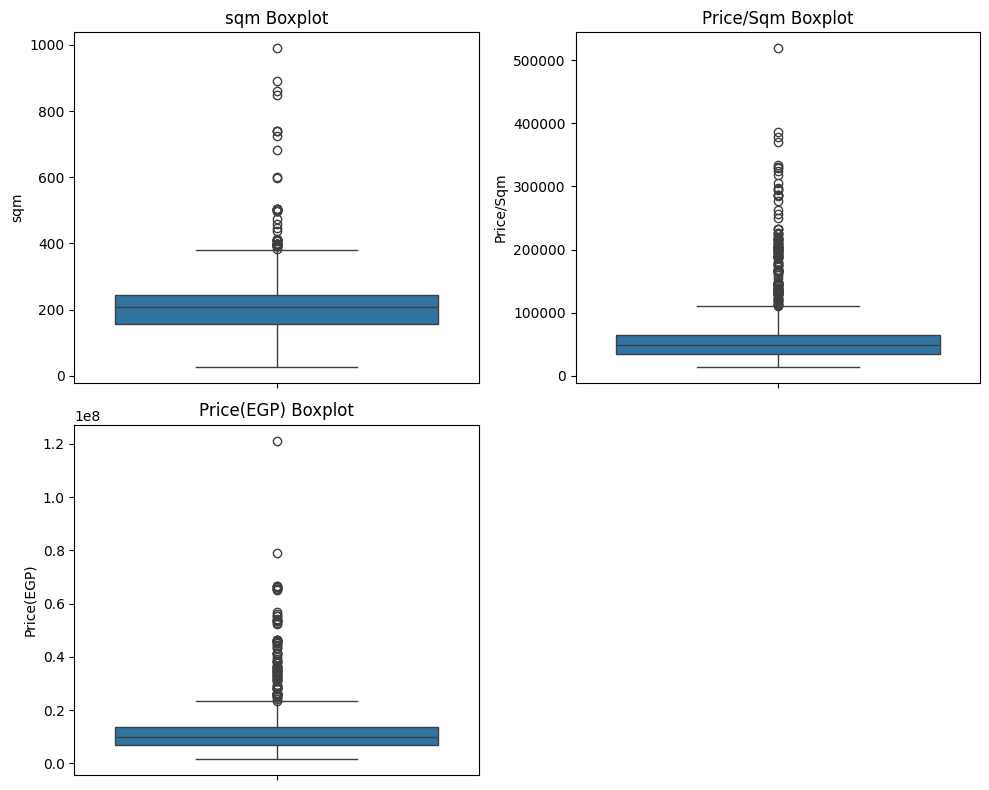

In [360]:
import matplotlib.pyplot as plt
import seaborn as sns
numerical_cols = ['sqm','Price/Sqm','Price(EGP)']
def boxplots(cols):
    """Plot boxplots for each column in cols to visualize outliers."""
    fig, (
        (ax1, ax2),
        (ax3, ax4)
    ) = plt.subplots(2,2,figsize=(10,8))

    # exclude ax4 from the chart 
    ax4.remove()

    # Plot the plots 
    for ax, col in zip([ax1,ax2,ax3], cols):
        plot = sns.boxplot(re_df[col], label=f"{col} boxplot", ax=ax)
        plot.set_title(f"{col} Boxplot")
    plt.tight_layout()
    plt.show()
    
boxplots(numerical_cols)

I see the many outliers in them, so I will separate them, and do a separated analysis for them

In [361]:
def outliers_dummy(cols):
    """Add boolean columns indicating outliers for each column in cols using the IQR method."""
    for col in cols:
        q1 = re_df[col].quantile(0.25) # Q1
        q3 = re_df[col].quantile(0.75) # Q3
        iqr = q3 - q1 # IQR
        low_lim = q1 - 1.5*iqr # Low bound of limitation
        upper_lim = q3 + 1.5*iqr # upper bound of limitation
        condition = (re_df[col] < low_lim) | (re_df[col] > upper_lim)
        re_df[f"Is {col} outlier"] = condition
        print(f"{condition.sum()} are outliers in {col} column")
outliers_dummy(numerical_cols)

55 are outliers in sqm column
138 are outliers in Price/Sqm column
104 are outliers in Price(EGP) column


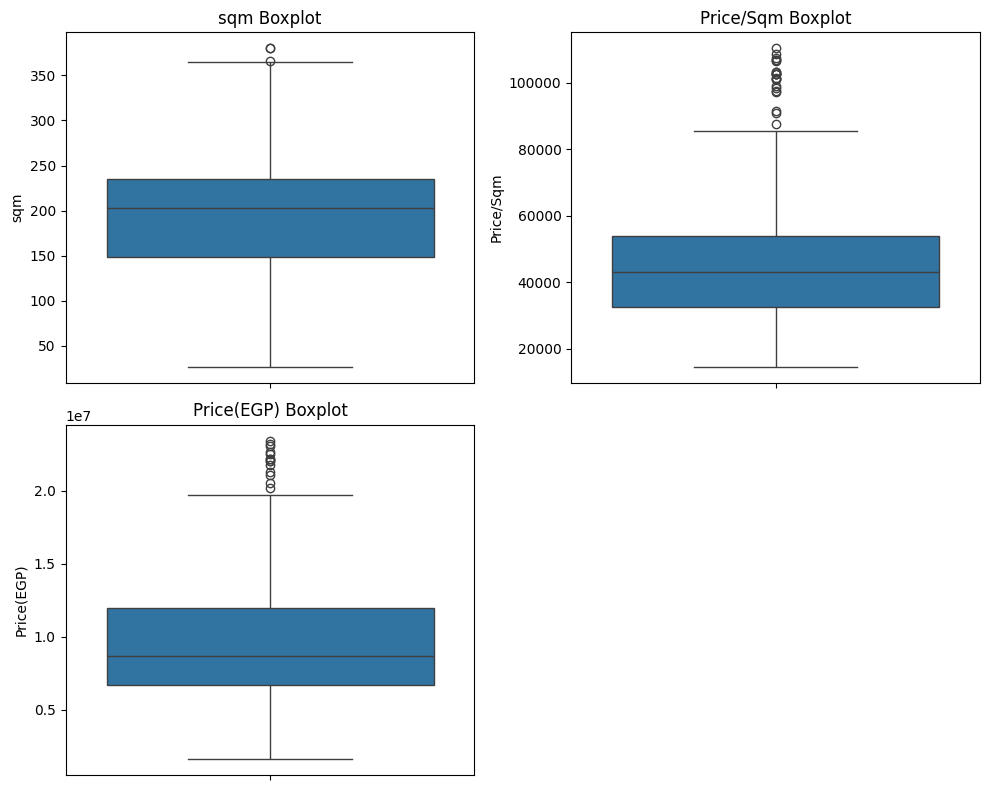

In [362]:
def non_outliers_boxplot(cols:list, outliers_dummies:list):
    """Plot boxplots for non-outlier values of each column in cols, using corresponding dummy columns."""
    # Note: outliers_dummies, and cols list should be the same order(e.g., [price, sqm, etc.], [price_outlier, sqm_outlier])
    fig, (
        (ax1, ax2),
        (ax3, ax4)
    ) = plt.subplots(2,2,figsize=(10,8))
    # exclude ax4 from the chart 
    ax4.remove()
    # Plot the plots 
    for ax, col, outliers_dummies in zip([ax1, ax2, ax3], cols, outliers_dummies):
        # Choose the non_outliers values
        x = re_df.loc[re_df[outliers_dummies] == False][col]
        plot = sns.boxplot(x, label=f"{col} boxplot", ax=ax)
        plot.set_title(f"{col} Boxplot")
    plt.tight_layout()
    plt.show()
non_outliers_cols = re_df.iloc[:,-3:].columns # the non_outliers dummies 

non_outliers_boxplot(numerical_cols, non_outliers_cols)

Ok now them outliers are reduced, and handled, the squeeze of the box plot reduced

## Normalizing the continuous data

In [363]:
re_df

,name,bedrooms,bathrooms,sqm,year_built,city,governorate,Price(EGP),property_category,property_subType,Price/Sqm,Other_feature,Security Gate_feature,Electricity Available_feature,24 Hour Security_feature,Gate Community_feature,Elevator(s)_feature,Water Available_feature,Lobby_feature,Has Floor?,Floor_1,Floor_2,Floor_3,Floor_4,Floor_5,Floor_6,Floor_7,Floor_Others,Floor_ground,has_easy access,has_modern,has_sports,has_lagoon,has_beach,has_garden,has_pool,has_retail,has_lake,has_view,Bedroom_0,Bedroom_1,Bedroom_2,Bedroom_3,Bedroom_4,Bedroom_Others,Bathroom_0,Bathroom_1,Bathroom_2,Bathroom_3,Bathroom_4,city_Cairo,city_Mansoura,city_Mersa Matruh,city_New Administrative Capital,city_New Cairo,city_North Coast,city_Old Cairo,governorate_Alexandria,governorate_Cairo,governorate_Dakahlia,governorate_Matrouh,property_category_Commercial,property_category_Residential,property_subType_Apartment (Residential - Multi-Story Units),property_subType_Office,property_subType_Others,property_subType_Residential - Attached Houses,property_subType_Retail,Is sqm outlier,Is Price/Sqm outlier,Is Price(EGP) outlier
0,Alamain (Latin District),1,0,92.86,2025,North Coast,Alexandria,6594000,Residential,Apartment (Residential - Multi-Story Units),71010.1228,1,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,False,False,False
1,Beachfront Tower - B1,3,3,398.00,2025,Mersa Matruh,Matrouh,66104000,Residential,Apartment (Residential - Multi-Story Units),166090.4523,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,True,True,True
2,PODIA,0,0,93.00,2025,Cairo,Cairo,12824000,Commercial,Office,137892.4731,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,False,True,False
3,Mazarine Apartment,3,3,252.00,2025,Mersa Matruh,Matrouh,12857000,Residential,Apartment (Residential - Multi-Story Units),51019.8413,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,False,False,False
4,Alamain (Latin District),3,0,209.42,2025,North Coast,Alexandria,8721000,Residential,Apartment (Residential - Multi-Story Units),41643.5870,1,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,Latin City,2,1,134.00,2025,North Coast,Matrouh,7967000,Residential,Apartment (Residential - Multi-Story Units),59455.2239,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,0,False,False,False
896,Alamain (Latin District),4,0,229.35,2025,North Coast,Alexandria,7063000,Residential,Apartment (Residential - Multi-Story Units),30795.7271,1,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,False,False,False
897,Central,0,0,217.17,2025,New Cairo,Cairo,41470000,Commercial,Office,190956.3936,0,0,1,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,False,True,True
898,Central,0,0,176.52,2025,New Cairo,Cairo,17350000,Commercial,Office,98289.1457,0,0,1,0,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,False,False,False


In [364]:
re_df[numerical_cols]

,sqm,Price/Sqm,Price(EGP)
0,92.86,71010.1228,6594000
1,398.00,166090.4523,66104000
2,93.00,137892.4731,12824000
3,252.00,51019.8413,12857000
4,209.42,41643.5870,8721000
...,...,...,...
895,134.00,59455.2239,7967000
896,229.35,30795.7271,7063000
897,217.17,190956.3936,41470000
898,176.52,98289.1457,17350000


I think take the log of the price/sqm, and Price, better for our unity, and reduce the outliers

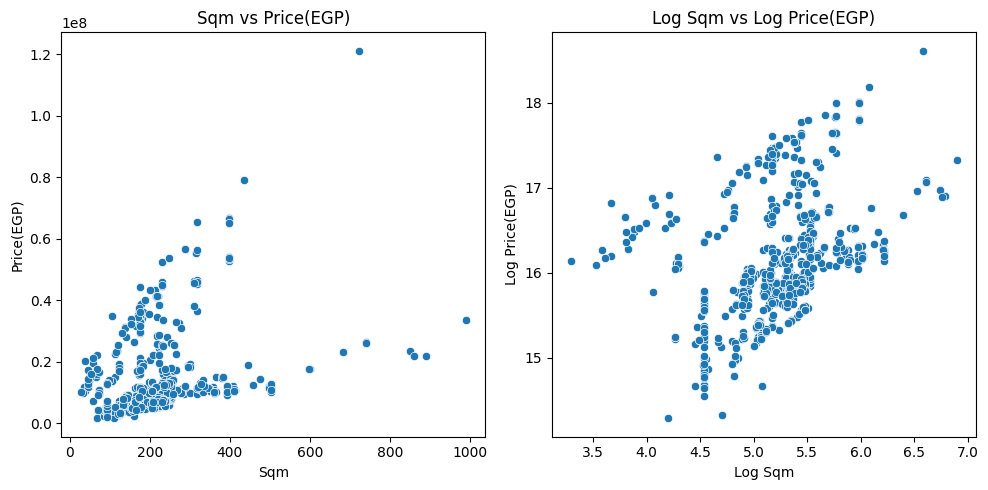

In [365]:
def two_scatters_plot(x:np.ndarray ,y:np.ndarray, x_name:str, y_name:str):
    """Plot two plots to compare them with different data

    Args:
        x (Array): original x values
        y (Array): Original y values
        x_name (str): xlabel 
        y_name (str): ylabel
    Returns:
        Logs: The logs of x, and y
    """
    plt.figure(figsize=(10,5)) # Make two plots one for sqm vs price, and the another sqm vs log(price)
    # sqm vs price
    plt.subplot(1,2,1)
    sns.scatterplot(x=x, y=y)
    plt.title(f"{x_name} vs {y_name}")
    plt.ylabel(y_name)
    plt.xlabel(x_name)
    
    log_x = np.log(x) #take the log of x
    log_y = np.log(y) #take the log of y
    log_x_name = "Log " + x_name # log xlabel
    log_y_name = "Log " + y_name # log ylabel
    #sqm vs log(price)
    plt.subplot(1,2,2)
    sns.scatterplot(x=log_x, y=log_y)
    plt.title(f"{log_x_name} vs {log_y_name}")
    plt.ylabel(log_y_name)
    plt.xlabel(log_x_name)
    plt.tight_layout()
    plt.show()
    return log_x, log_y

# Assign the returned arrays to separate columns
re_df["log(sqm)"], re_df["log(price)"] = two_scatters_plot(re_df["sqm"], re_df["Price(EGP)"], "Sqm", "Price(EGP)")

Logs of them is better, because The large values of price, and sqm make the scatter limited to the left corner only

That's better

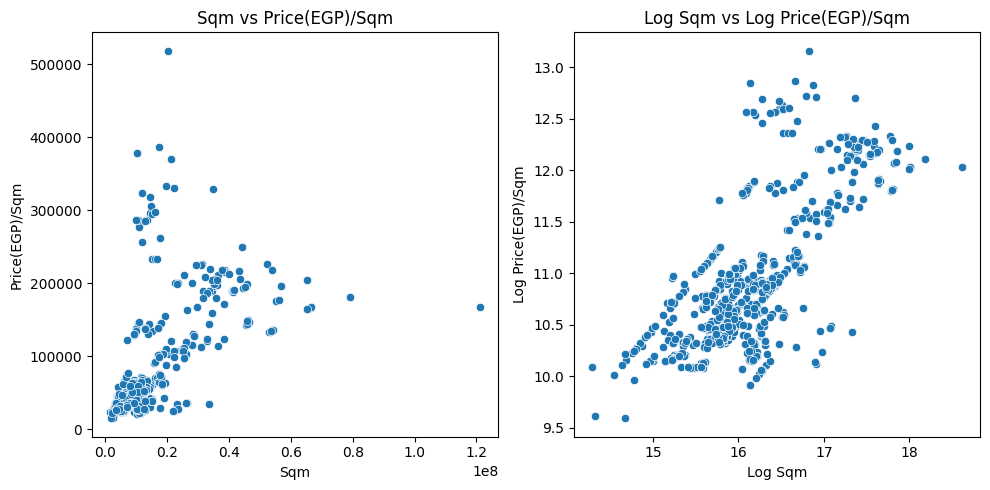

In [366]:
_, re_df["log(price/sqm)"] = two_scatters_plot(re_df["Price(EGP)"],re_df["Price/Sqm"], "Sqm", "Price(EGP)/Sqm")

Logs also better, because the data in the left plot limited in the left corner, but on the other hand the right plot shows a spread linear data

## Final data

In [367]:
re_df

,name,bedrooms,bathrooms,sqm,year_built,city,governorate,Price(EGP),property_category,property_subType,Price/Sqm,Other_feature,Security Gate_feature,Electricity Available_feature,24 Hour Security_feature,Gate Community_feature,Elevator(s)_feature,Water Available_feature,Lobby_feature,Has Floor?,Floor_1,Floor_2,Floor_3,Floor_4,Floor_5,Floor_6,Floor_7,Floor_Others,Floor_ground,has_easy access,has_modern,has_sports,has_lagoon,has_beach,has_garden,has_pool,has_retail,has_lake,has_view,Bedroom_0,Bedroom_1,Bedroom_2,Bedroom_3,Bedroom_4,Bedroom_Others,Bathroom_0,Bathroom_1,Bathroom_2,Bathroom_3,Bathroom_4,city_Cairo,city_Mansoura,city_Mersa Matruh,city_New Administrative Capital,city_New Cairo,city_North Coast,city_Old Cairo,governorate_Alexandria,governorate_Cairo,governorate_Dakahlia,governorate_Matrouh,property_category_Commercial,property_category_Residential,property_subType_Apartment (Residential - Multi-Story Units),property_subType_Office,property_subType_Others,property_subType_Residential - Attached Houses,property_subType_Retail,Is sqm outlier,Is Price/Sqm outlier,Is Price(EGP) outlier,log(sqm),log(price),log(price/sqm)
0,Alamain (Latin District),1,0,92.86,2025,North Coast,Alexandria,6594000,Residential,Apartment (Residential - Multi-Story Units),71010.1228,1,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,False,False,False,4.531093,15.701671,11.170578
1,Beachfront Tower - B1,3,3,398.00,2025,Mersa Matruh,Matrouh,66104000,Residential,Apartment (Residential - Multi-Story Units),166090.4523,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,True,True,True,5.986452,18.006740,12.020288
2,PODIA,0,0,93.00,2025,Cairo,Cairo,12824000,Commercial,Office,137892.4731,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,False,True,False,4.532599,16.366829,11.834229
3,Mazarine Apartment,3,3,252.00,2025,Mersa Matruh,Matrouh,12857000,Residential,Apartment (Residential - Multi-Story Units),51019.8413,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,False,False,False,5.529429,16.369399,10.839970
4,Alamain (Latin District),3,0,209.42,2025,North Coast,Alexandria,8721000,Residential,Apartment (Residential - Multi-Story Units),41643.5870,1,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,False,False,False,5.344342,15.981244,10.636903
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,Latin City,2,1,134.00,2025,North Coast,Matrouh,7967000,Residential,Apartment (Residential - Multi-Story Units),59455.2239,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,0,False,False,False,4.897840,15.890819,10.992979
896,Alamain (Latin District),4,0,229.35,2025,North Coast,Alexandria,7063000,Residential,Apartment (Residential - Multi-Story Units),30795.7271,1,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,False,False,False,5.435249,15.770380,10.335131
897,Central,0,0,217.17,2025,New Cairo,Cairo,41470000,Commercial,Office,190956.3936,0,0,1,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,False,True,True,5.380680,17.540481,12.159800
898,Central,0,0,176.52,2025,New Cairo,Cairo,17350000,Commercial,Office,98289.1457,0,0,1,0,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,False,False,False,5.173434,16.669103,11.495669


In [368]:
### Save it as a csv file
### Reset the index
re_df.reset_index(drop=True)
re_df.to_csv("processed_real_estate.csv", index=False)

## Summary:
- Removed duplicates
- Handled missing values(No missing values)
- Fixed the price, and features columns formats
- Separated Property category from property sub type, combine the rare unique value in Others value
- Created Price/Sqm column
- Made OHE for every feature in the features column list
- Extracted columns from Address such as Has floor, Floor number
- Extracted some columns from description such as has_pool, has_garden, has_lake, etc.
- Made OHE for city, governorate, property(category, and subtype)
- Handled the outliers of the continuous data
- Take the log of the continuous data because of Large values